In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import xlwings as xw

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

In [2]:
folderName = 'C:\\Users\\ms\\Desktop\\qb_trans_ALL\\'
fileName = folderName + 'daily.xlsx'
data = pd.read_excel(fileName,sheet_name='Sheet1')

In [3]:
data

,用户uid,交易订单ID,交易时间,状态,交易类型,交易金额,商户名称,付款银行,卡种类,支付渠道,期数,备注
0,27695471130591232,138738973545627650,2018-07-05 11:52:18,成功,年费,1.00,年费,上海银行,赢卡,NaN,1,NaN
1,27695471130591232,138740892322005096,2018-07-05 12:22:04,成功,消费,7.00,深圳市顶全便利店有限公司（全家）,上海银行,赢卡,QR,1,NaN
2,27695471130591232,138928435292045413,2018-07-07 12:53:06,成功,消费,32.00,美团点评（商城）（云闪付）,上海银行,赢卡,AM,1,NaN
3,27695471130591232,140227886237646858,2018-07-21 13:03:15,成功,消费,31.50,美团点评（商城）（云闪付）,上海银行,赢卡,AM,1,NaN
4,27735476603469824,138738875835908208,2018-07-05 11:50:47,成功,年费,1.00,年费,上海银行,赢卡,NaN,1,NaN
5,27735476603469824,139017238034284556,2018-07-08 11:51:30,成功,消费,20.38,美团点评（商城）（云闪付）,上海银行,赢卡,AM,1,NaN
6,27735476603469824,139051294979293199,2018-07-08 20:40:09,成功,消费,22.90,美团点评（商城）（云闪付）,上海银行,赢卡,AM,1,NaN
7,28057837660028928,138738973547462665,2018-07-05 11:52:18,成功,年费,1.00,年费,上海银行,赢卡,NaN,1,NaN
8,29396022629253120,138755418975141990,2018-07-05 16:07:34,成功,年费,1.00,年费,上海银行,赢卡,NaN,1,NaN
9,31425365824258048,138739037971972205,2018-07-05 11:53:18,成功,年费,1.00,年费,上海银行,赢卡,NaN,1,NaN


In [4]:
data.shape

(949, 12)

In [5]:
# 筛选支付状态为成功的数据
data = data[data['状态'] == '成功']

In [6]:
'''
# 交易类型是消费和提现的总unique人数
screenData = data[data['交易类型'] == '消费'].append(data[data['交易类型'] == '提现'])
len(set(screenData['用户uid']))
'''

"\n# 交易类型是消费和提现的总unique人数\nscreenData = data[data['交易类型'] == '消费'].append(data[data['交易类型'] == '提现'])\nlen(set(screenData['用户uid']))\n"

### 自动获取日期

In [7]:


# 今天的日期
today = datetime.date.today()

# 昨天的日期
yesterday = (datetime.date.today() + datetime.timedelta(days=-1)).strftime('%Y-%m-%d')
yesterday = datetime.datetime.strptime(yesterday, "%Y-%m-%d")
yesterday = yesterday.date()

In [8]:
# 获取上周日日期
def getLastSunday():

    today = datetime.date.today()

    oneday = datetime.timedelta(days = -1)

    m1 = calendar.SUNDAY

    while today.weekday() != m1:
        today += oneday

    lastSunday = today.strftime('%Y-%m-%d')

    return datetime.datetime.strptime(lastSunday, "%Y-%m-%d").date()


# 获取上周一日期
def getLastMonday():

    lastSunday = getLastSunday()

    oneday = datetime.timedelta(days = -1)

    m1 = calendar.MONDAY

    while lastSunday.weekday() != m1:
        lastSunday += oneday

    lastMonday = lastSunday.strftime('%Y-%m-%d')

    return datetime.datetime.strptime(lastMonday, "%Y-%m-%d").date()


In [9]:
reportName = 'C:\\Users\\ms\\Desktop\\qb_trans_ALL\\dailyReport.xlsx'
wb1 = xw.Book(reportName)
detail_sheet1 = xw.Sheet("统计报表")


detail_sheet1.range('B3').options(transpose=True).value='消费'
detail_sheet1.range('D3').options(transpose=True).value='交易笔数'
detail_sheet1.range('E3').options(transpose=True).value='交易金额'
detail_sheet1.range('F3').options(transpose=True).value='交易人数'
detail_sheet1.range('G3').options(transpose=True).value='首次交易人数'
detail_sheet1.range('H3').options(transpose=True).value='笔均数额'

detail_sheet1.range('B7').options(transpose=True).value='提现'
detail_sheet1.range('D7').options(transpose=True).value='交易笔数'
detail_sheet1.range('E7').options(transpose=True).value='交易金额'
detail_sheet1.range('F7').options(transpose=True).value='交易人数'
detail_sheet1.range('G7').options(transpose=True).value='首次交易人数'
detail_sheet1.range('H7').options(transpose=True).value='笔均数额'


### 统计昨天信息

In [10]:

# 昨天统计
yesterdayData = data[data['交易时间'].apply(lambda x : x.month == yesterday.month  and x.day == yesterday.day )]
# 获取昨天之前的数据
yesBefor = data[data['交易时间'].apply(lambda x : (x.month == 7 and x.day < yesterday.day) or (x.month < yesterday.month )  )]

for subData in yesBefor.groupby('交易类型'):
    if subData[0] == '消费':
        yesBeforUconsume = list(set(subData[1]['用户uid']))
    elif subData[0] == '提现':
        yesBeforUdraw = list(set(subData[1]['用户uid']))
        

for subData in yesterdayData.groupby('交易类型'):
    if subData[0] == '消费':
        yes_consume = {}
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = subData[1]['交易金额'].sum() / len(subData[1]['交易订单ID'])
       
        
        for i in set(subData[1]['用户uid']):
            if i not in yesBeforUconsume:
                newUser.append(i)
        
        detail_sheet1.range('C4').options(transpose=True).value='昨日:'+str(yesterday)
        detail_sheet1.range('D4').options(transpose=True).value=tradeTotal
        detail_sheet1.range('E4').options(transpose=True).value=tradeAmount
        detail_sheet1.range('F4').options(transpose=True).value= tradeNum
        detail_sheet1.range('G4').options(transpose=True).value= len(newUser)
        detail_sheet1.range('H4').options(transpose=True).value= aveTrade
        wb1.save()
        
    if subData[0] == '提现':
        
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = subData[1]['交易金额'].sum() / len(subData[1]['交易订单ID'])
        
        for i in set(subData[1]['用户uid']):
            if i not in yesBeforUdraw:
                newUser.append(i)
        
        
        detail_sheet1.range('C8').options(transpose=True).value='昨日:'+str(yesterday)
        detail_sheet1.range('D8').options(transpose=True).value = tradeTotal
        detail_sheet1.range('E8').options(transpose=True).value = tradeAmount
        detail_sheet1.range('F8').options(transpose=True).value = tradeNum
        detail_sheet1.range('G8').options(transpose=True).value = len(newUser)
        detail_sheet1.range('H8').options(transpose=True).value = aveTrade
        wb1.save()


### 上周的数据

In [11]:

lastWeekData  = data[data['交易时间'].apply(lambda x : (x.month == getLastSunday().month  and x.day <= getLastSunday().day) 
                                        and ( x.month == getLastMonday().month and x.day >= getLastMonday().day  ))]
# 获取上周之前的数据
lastWeekBefor = data[data['交易时间'].apply(lambda x : (x.month == getLastMonday().month and x.day < getLastMonday().day) 
                                        or (x.month < getLastMonday().month )  )]

for subData in lastWeekBefor.groupby('交易类型'):
    if subData[0] == '消费':
        lastWeekBeforUconsume = list(set(subData[1]['用户uid']))
    elif subData[0] == '提现':
        lastWeekBeforUdraw = list(set(subData[1]['用户uid']))


for subData in lastWeekData.groupby('交易类型'):
    if subData[0] == '消费':
        yes_consume = {}
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = subData[1]['交易金额'].sum() / len(subData[1]['交易订单ID'])
        
        for i in set(subData[1]['用户uid']):
            if i not in lastWeekBeforUconsume:
                newUser.append(i)
        
        detail_sheet1.range('C5').options(transpose=True).value='上周:'+str(getLastMonday())+'~'+str(getLastSunday())
        detail_sheet1.range('D5').options(transpose=True).value=tradeTotal
        detail_sheet1.range('E5').options(transpose=True).value=tradeAmount
        detail_sheet1.range('F5').options(transpose=True).value= tradeNum
        detail_sheet1.range('G5').options(transpose=True).value= len(newUser)
        detail_sheet1.range('H5').options(transpose=True).value= aveTrade
        wb1.save()
        
    if subData[0] == '提现':
        yes_drawing = {}
        
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = tradeAmount / tradeTotal
        
        for i in set(subData[1]['用户uid']):
            if i not in lastWeekBeforUdraw:
                newUser.append(i)
        
        detail_sheet1.range('C9').options(transpose=True).value='上周:'+str(getLastMonday())+'~'+str(getLastSunday())
        detail_sheet1.range('D9').options(transpose=True).value = tradeTotal
        detail_sheet1.range('E9').options(transpose=True).value = tradeAmount
        detail_sheet1.range('F9').options(transpose=True).value = tradeNum
        detail_sheet1.range('G9').options(transpose=True).value = len(newUser)
        detail_sheet1.range('H9').options(transpose=True).value = aveTrade
        wb1.save()

### 历史数据

In [12]:

historyData  = data[~data['交易时间'].apply(lambda x : x.month == today.month  and x.day == today.day  )]

for subData in historyData.groupby('交易类型'):
    if subData[0] == '消费':
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = tradeAmount / tradeTotal
    
        detail_sheet1.range('C6').options(transpose=True).value='历史信息<'+str(today)
        detail_sheet1.range('D6').options(transpose=True).value=tradeTotal
        detail_sheet1.range('E6').options(transpose=True).value=tradeAmount
        detail_sheet1.range('F6').options(transpose=True).value= tradeNum
        detail_sheet1.range('G6').options(transpose=True).value= 'N/A'
        detail_sheet1.range('H6').options(transpose=True).value= aveTrade
        wb1.save()
        
    if subData[0] == '提现':       
        newUser = []
        
        tradeTotal = len(subData[1]['交易订单ID']) # 交易笔数
        tradeNum = len(set(subData[1]['用户uid']))   # 人数
        tradeAmount = subData[1]['交易金额'].sum() # 交易金额
        aveTrade = tradeAmount / tradeTotal   
    
        detail_sheet1.range('C10').options(transpose=True).value='历史信息<'+str(today)
        detail_sheet1.range('D10').options(transpose=True).value = tradeTotal
        detail_sheet1.range('E10').options(transpose=True).value = tradeAmount
        detail_sheet1.range('F10').options(transpose=True).value = tradeNum
        detail_sheet1.range('G10').options(transpose=True).value= 'N/A'
        detail_sheet1.range('H10').options(transpose=True).value = aveTrade

        wb1.save()

### 绘图

In [13]:


#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman' # 中文除外的设置成New Roman，中文设置成宋体


In [14]:
# 将交易时间转化为年月日，去掉时间
data['交易时间'] = data['交易时间'].apply( lambda x: datetime.datetime.strptime(x.strftime("%Y-%m-%d") ,"%Y-%m-%d"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:

for subData in data.groupby('交易类型'):
    # 消费数据集
    if subData[0] == '消费':
        
        consumeData = subData[1]
    # 提现数据集
    if subData[0] == '提现':
        drawData = subData[1]

#### 保存消费和提现数据

In [32]:
import xlwings as xw
# 把消费和提现数据分别提取出来保存到表格

# 消费
consumeGroupbyDate = consumeData.groupby(consumeData['交易时间'])

consumeGroupbyDateSum = consumeGroupbyDate['交易金额'].sum()  # 每天的交易金额
consumeGroupbyDateUser = consumeGroupbyDate['用户uid'].apply(lambda x: len(set(x))) # 每天的交易人数
consumeGroupbyDateCount = consumeGroupbyDate['交易订单ID'].count() # 每天的交易笔数
consumeGroupbyDateAve = consumeGroupbyDate['交易金额'].sum() / consumeGroupbyDate['交易订单ID'].count() # 每天的笔均数额

wb2 = xw.Book(reportName)
detail_sheet2 = xw.Sheet("消费和提现分类数据")


#detail_sheet2.range('A1').options(transpose=True).value=consumeGroupbyDateSum
#xw.Range('C2').expand('table').value =  consumeGroupbyDateUser
detail_sheet2.range('C3').options(transpose=True).value = consumeGroupbyDateUser.index.tolist()
detail_sheet2.range('D3').options(transpose=True).value = consumeGroupbyDateUser.values
#xw.Range('D1').expand('table').value =  consumeGroupbyDateCount.reset_index(drop=True) # 去掉索引重新索引
detail_sheet2.range('E3').options(transpose=True).value = consumeGroupbyDateCount.values
detail_sheet2.range('F3').options(transpose=True).value=  consumeGroupbyDateSum.values
detail_sheet2.range('G3').options(transpose=True).value =  consumeGroupbyDateAve.values


# 提现
drawGroupbyDate = drawData.groupby(drawData['交易时间'])

drawGroupbyDateSum = drawGroupbyDate['交易金额'].sum()  # 每天的交易金额
drawGroupbyDateUser = drawGroupbyDate['用户uid'].apply(lambda x: len(set(x))) # 每天的交易人数
drawGroupbyDateCount = drawGroupbyDate['交易订单ID'].count() # 每天的交易笔数
drawGroupbyDateAve = drawGroupbyDate['交易金额'].sum() / drawGroupbyDate['交易订单ID'].count() # 每天的笔均数额

#xw.Range('K2').expand('table').value =  drawGroupbyDateUser
detail_sheet2.range('K3').options(transpose=True).value = drawGroupbyDateUser.index.tolist()
detail_sheet2.range('L3').options(transpose=True).value = drawGroupbyDateUser.values
#xw.Range('D1').expand('table').value =  consumeGroupbyDateCount.reset_index(drop=True) # 去掉索引重新索引
detail_sheet2.range('M3').options(transpose=True).value = drawGroupbyDateCount.values
detail_sheet2.range('N3').options(transpose=True).value=  drawGroupbyDateSum.values
detail_sheet2.range('O3').options(transpose=True).value =  drawGroupbyDateAve.values

wb2.save()

### 绘制消费和提现数据 

In [63]:
dateTime= []
consumeCount = [] # 消费人数
consumeTotal = [] # 消费笔数
consumeRate = [] # 消费均额
# 消费
for i,j in consumeData.groupby('交易时间'):
    dateTime.append(i)
    consumeCount.append(len(set(j['用户uid'])))
    consumeTotal.append(len(j['交易订单ID']))
    consumeRate.append(sum(j['交易金额']/len(j['交易订单ID'])))


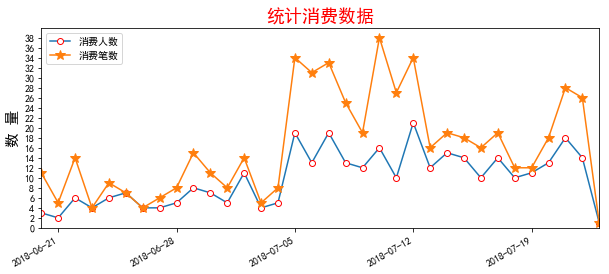

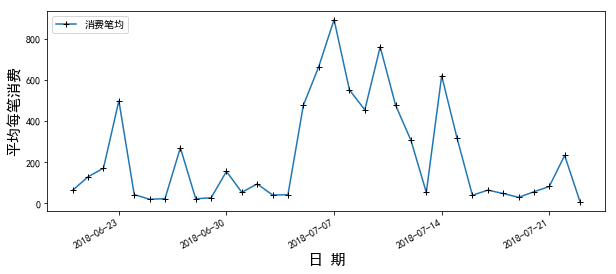

In [64]:
# 绘制消费数据

fig = plt.figure(figsize=(10,9)) 
ax1 = fig.add_subplot(211)
# mec 边界颜色；mfc 填充颜色；
plt.plot(dateTime, consumeCount, marker='o', mec='r', mfc='w',label='消费人数') 
plt.plot(dateTime, consumeTotal, marker='*', ms=10,label= '消费笔数')

plt.legend(loc='upper left')  # 让图例生效
plt.margins(0) # 收缩空白
plt.subplots_adjust(bottom=0.15)

# plt.xlabel("日 期",fontsize=10) #X轴标签
fig.autofmt_xdate(rotation = 30) # x轴标签倾斜30度


plt.ylabel("数 量",fontsize=15) #Y轴标签
plt.ylim((0, 40))  # 范围 
plt.yticks(np.arange(0, 40, 2)) # 刻度
plt.title("统计消费数据",fontsize=18,color='r') #标题

# 绘制笔均
fig = plt.figure(figsize=(10,9)) 
ax2 = fig.add_subplot(212)

plt.plot(dateTime,consumeRate,marker='+', mec='k', mfc='w',label = '消费笔均')
plt.legend(loc='upper left') 
plt.subplots_adjust(bottom=0.15)

plt.xlabel("日 期",fontsize=15) #X轴标签
plt.ylabel("平均每笔消费",fontsize=15) #Y轴标签
fig.autofmt_xdate(rotation = 30)


plt.show()

In [65]:
# 提现

drawDateTime= []
drawCount = [] # 提现人数
drawTotal = [] # 提现笔数
drawRate = []

for i,j in drawData.groupby('交易时间'):
    drawDateTime.append(i)
    drawCount.append(len(set(j['用户uid'])))
    drawTotal.append(len(j['交易订单ID']))
    drawRate.append(sum(j['交易金额']/len(j['交易订单ID'])))

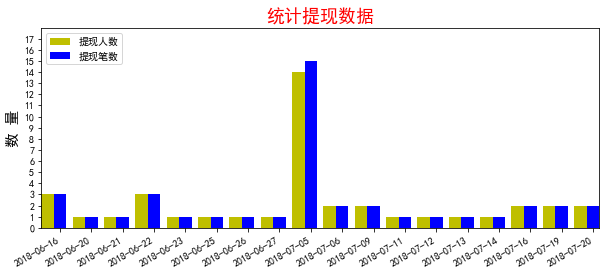

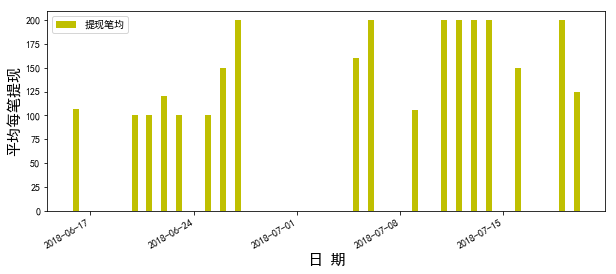

In [66]:
fig = plt.figure(figsize=(10,9)) 
ax1 = fig.add_subplot(211) 

# 折线图
#plt.plot(drawDateTime, drawCount, marker='o', mec='r', mfc='w',label='提现人数')
#plt.plot(drawDateTime, drawTotal, marker='*', ms=10,label= '提现笔数')

# 柱状图
x =list(range(len(drawDateTime)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, drawCount,width=width,fc = 'y',label='提现人数')
for i in range(len(drawDateTime)):
    x[i] = x[i] + width

# 去掉drawDateTime结尾的时间保留日期    
dts = []    
for dt in drawDateTime:
    dts.append(str(dt).split(' ')[0])
plt.bar(x, drawTotal,width=width,fc = 'b',tick_label = dts,label= '提现笔数')


plt.legend(loc='upper left')  # 让图例生效
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
#plt.xlabel("日 期",fontsize=10) #X轴标签
plt.ylabel("数 量",fontsize=15) #Y轴标签
plt.ylim((0, 18))
plt.yticks(np.arange(0, 18, 1))
plt.title("统计提现数据",fontsize=18,color='r') #标题
fig.autofmt_xdate(rotation = 30)



fig = plt.figure(figsize=(10,9))
ax2 = fig.add_subplot(212)

#plt.plot(drawDateTime,drawRate,marker='+', mec='k', mfc='w',label = '提现笔均')

# 柱状图
plt.bar(drawDateTime, drawRate,width=width,fc = 'y',label='提现笔均')
plt.legend(loc='upper left')
plt.subplots_adjust(bottom=0.15)

plt.xlabel("日 期",fontsize=15) #X轴标签
#plt.xticks(np.array(drawDateTime))
plt.ylabel("平均每笔提现",fontsize=15) #Y轴标签
fig.autofmt_xdate(rotation = 30)

plt.show()